In [ ]:
!pip install tensorflow==2.18.1
!pip install mediapipe
!pip install neurite@git+https://github.com/adalca/neurite.git@40c6d0e277b12dc9dddb6e76f2dbdd373b7d22b1
!pip install voxelmorph@git+https://github.com/voxelmorph/voxelmorph.git@923a37d51b0c8d93eb576156c07ecb25c2a4e730


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 23.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 60.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 12.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2

[notice] A new release of pip is available: 23.0.1 ->

# **Import Libraries**

In [ ]:
import tensorflow as tf
import voxelmorph as vxm
import matplotlib.pyplot as plt
import numpy as np
import cv2
from zipfile import ZipFile
import os
import time

E0000 00:00:1756189776.706038      10 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:230
/usr/local/lib/python3.10/site-packages/neurite/__init__.py:33: FutureWarning: The default backend will soon be changing to 'pytorch'. If you prefer to use TensorFlow, please set the NEURITE_BACKEND environment variable to 'tensorflow'.
  backend = py.utils.get_backend()


In [ ]:
if len(tf.config.list_logical_devices('TPU')) > 0 :
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='local')
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
elif len(tf.config.list_logical_devices('GPU')) > 0 :
    gpus = tf.config.list_logical_devices('GPU')
    strategy = tf.distribute.MirroredStrategy(gpus)
else :
    strategy = tf.distribute.get_strategy()

I0000 00:00:1756189796.555067      10 service.cc:148] XLA service 0x5c4c79ca1330 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756189796.555109      10 service.cc:156]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1756189796.555113      10 service.cc:156]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1756189796.555116      10 service.cc:156]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1756189796.555119      10 service.cc:156]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1756189796.555122      10 service.cc:156]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1756189796.555125      10 service.cc:156]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1756189796.555127      10 service.cc:156]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1756189796.555130      10 service.cc:156]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [ ]:
BATCH_SIZE = 8
IMAGE_SIZE = (512, 384)

# **Import Data**

In [ ]:
train_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image-parse-agnostic-v3.2',
                                                                   labels=None,
                                                                   image_size=IMAGE_SIZE,
                                                                   batch_size=None,
                                                                   shuffle=False,
                                                                   subset='training',
                                                                   validation_split=0.12
                                                                  )
val_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image-parse-agnostic-v3.2',
                                                                 labels=None,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=None,
                                                                 shuffle=False,
                                                                 subset='validation',
                                                                 validation_split=0.12
                                                                )
test_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/image-parse-agnostic-v3.2',
                                                                  labels=None,
                                                                  image_size=IMAGE_SIZE,
                                                                  batch_size=None,
                                                                  shuffle=False,
                                                                 )

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


In [ ]:
train_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image-parse-v3',
                                                          labels=None,
                                                          image_size=IMAGE_SIZE,
                                                          batch_size=None,
                                                          shuffle=False,
                                                          subset='training',
                                                          validation_split=0.12,
                                                         )
val_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image-parse-v3',
                                                        labels=None,
                                                        image_size=IMAGE_SIZE,
                                                        batch_size=None,
                                                        shuffle=False,
                                                        subset='validation',
                                                        validation_split=0.12,
                                                       )
test_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/image-parse-v3',
                                                         labels=None,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=None,
                                                         shuffle=False
                                                        )

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image',
                                                           labels=None,
                                                           image_size=IMAGE_SIZE,
                                                           batch_size=None,
                                                           shuffle=False,
                                                           subset='training',
                                                           validation_split=0.12
                                                          ).map(lambda x: x / 255)
val_images = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image',
                                                         labels=None,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=None,
                                                         shuffle=False,
                                                         subset='validation',
                                                         validation_split=0.12
                                                        ).map(lambda x: x / 255)
test_images = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/image',
                                                          labels=None,
                                                          image_size=IMAGE_SIZE,
                                                          batch_size=None,
                                                          shuffle=False
                                                         ).map(lambda x: x / 255)

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


In [ ]:
train_clothes = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth',
                                                            labels=None,
                                                            image_size=IMAGE_SIZE,
                                                            batch_size=None,
                                                            shuffle=False,
                                                            subset='training',
                                                            validation_split=0.12
                                                           ).map(lambda x: x / 255)
val_clothes = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth',
                                                          labels=None,
                                                          image_size=IMAGE_SIZE,
                                                          batch_size=None,
                                                          shuffle=False,
                                                          subset='validation',
                                                          validation_split=0.12
                                                         ).map(lambda x: x / 255)
test_clothes = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/cloth',
                                                           labels=None,
                                                           image_size=IMAGE_SIZE,
                                                           batch_size=None,
                                                           shuffle=False
                                                          ).map(lambda x: x / 255)

train_clothes_mask = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth-mask',
                                                                 labels=None,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=None,
                                                                 shuffle=False,
                                                                 subset='training',
                                                                 validation_split=0.12
                                                                )
val_clothes_mask = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth-mask',
                                                               labels=None,
                                                               image_size=IMAGE_SIZE,
                                                               batch_size=None,
                                                               shuffle=False,
                                                               subset='validation',
                                                               validation_split=0.12
                                                              )
test_clothes_mask = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/cloth-mask',
                                                               labels=None,
                                                               image_size=IMAGE_SIZE,
                                                               batch_size=None,
                                                               shuffle=False)

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.
Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


# **Data Preprocessing**

## Clothes Mask

In [ ]:
def threshold_clothes_mask(image) :
    image = tf.reduce_mean(image, axis=-1)
    mask = tf.where(image > 127, 1.0, 0.0)
    mask = tf.expand_dims(mask, axis=-1)
    return mask

In [ ]:
train_clothes_mask = train_clothes_mask.map(threshold_clothes_mask)
val_clothes_mask = val_clothes_mask.map(threshold_clothes_mask)
test_clothes_mask = test_clothes_mask.map(threshold_clothes_mask)

## Create Pose Skeleton with MediaPipe

In [ ]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(image_size, detection_result, image=None):
    pose_landmarks_list = detection_result.pose_landmarks
    if image is None :
        canvas = np.zeros(image_size)
    else :
        canvas = np.copy(image)

    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]

        # Draw the pose landmarks.
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend([
          landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
        ])
        solutions.drawing_utils.draw_landmarks(
          canvas,
          pose_landmarks_proto,
          solutions.pose.POSE_CONNECTIONS,
          solutions.drawing_styles.get_default_pose_landmarks_style())
    return canvas

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

I0000 00:00:1756190052.997802      10 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1756190053.098243    3078 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1756190053.312233    3078 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [ ]:
def apply_mediapipe(tensor) :
    def process(input_) :
        input_int = (input_.numpy() * 255).astype(np.uint8)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=input_int)
        detection_result = detector.detect(mp_image)
        landmark = draw_landmarks_on_image(input_int.shape, detection_result)
        landmark = np.expand_dims(np.mean(landmark, axis=-1), axis=-1)
        return np.array(landmark, dtype=np.float32) / 255
    return tf.py_function(process, [tensor], tf.float32)

In [ ]:
train_landmark = train_images.map(apply_mediapipe).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))
val_landmark = val_images.map(apply_mediapipe).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))
test_landmark = test_images.map(apply_mediapipe).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))

## Combine Person Image and Agnostic Parse

In [ ]:
def filter_clothes(image, mask) :
    mask = tf.reduce_all(tf.equal(mask, tf.constant([0, 0, 0], dtype=tf.float32)), axis=-1)
    mask = tf.cast(tf.expand_dims(tf.logical_not(mask), axis=-1), tf.float32)
    image_masked = tf.multiply(image, mask)
    return image_masked

In [ ]:
train_images_agnostic = tf.data.Dataset.zip(train_images, train_agnostic_parse).map(lambda x, y: filter_clothes(x, y))
val_images_agnostic = tf.data.Dataset.zip(val_images, val_agnostic_parse).map(lambda x, y: filter_clothes(x, y))
test_images_agnostic = tf.data.Dataset.zip(test_images, test_agnostic_parse).map(lambda x, y: filter_clothes(x, y))

## Extract Clothes from the Images

In [ ]:
def extract_warped_clothes(image, mask) :
    cloth_mask = tf.reduce_all(tf.equal(mask,
                                        tf.constant([254, 85, 0], dtype=tf.float32)),
                               axis=-1)
    dress_mask = tf.reduce_all(tf.equal(mask,
                                        tf.constant([0, 0, 85], dtype=tf.float32)),
                               axis=-1)
    coat_mask = tf.reduce_all(tf.equal(mask,
                                        tf.constant([0, 119, 220], dtype=tf.float32)),
                               axis=-1)
    cloth_mask_inv = tf.cast(tf.expand_dims(tf.logical_not(cloth_mask), axis=-1), tf.float32)
    dress_mask_inv = tf.cast(tf.expand_dims(tf.logical_not(dress_mask), axis=-1), tf.float32)
    coat_mask_inv = tf.cast(tf.expand_dims(tf.logical_not(coat_mask), axis=-1), tf.float32)
    background = (cloth_mask_inv * dress_mask_inv * coat_mask_inv) * (246 / 255)

    cloth_mask = tf.cast(tf.expand_dims(cloth_mask, axis=-1), tf.float32)
    dress_mask = tf.cast(tf.expand_dims(dress_mask, axis=-1), tf.float32)
    coat_mask = tf.cast(tf.expand_dims(coat_mask, axis=-1), tf.float32)
    mask = cloth_mask + dress_mask + coat_mask

    masked_image = tf.multiply(image, mask) + background
    return masked_image

In [ ]:
train_warped_clothes = tf.data.Dataset.zip(train_images, train_parse).map(lambda x, y: extract_warped_clothes(x, y))
val_warped_clothes = tf.data.Dataset.zip(val_images, val_parse).map(lambda x, y: extract_warped_clothes(x, y))
test_warped_clothes = tf.data.Dataset.zip(test_images, test_parse).map(lambda x, y: extract_warped_clothes(x, y))

## Zip Inputs and Labels

In [ ]:
train_dataset = tf.data.Dataset.zip(
    tf.data.Dataset.zip(train_images_agnostic, train_landmark, train_clothes, train_clothes_mask),
    tf.data.Dataset.zip(train_warped_clothes, train_images)
).cache().shuffle(BATCH_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dist_data = strategy.experimental_distribute_dataset(train_dataset)

val_dataset = tf.data.Dataset.zip(
    tf.data.Dataset.zip(val_images_agnostic, val_landmark, val_clothes, val_clothes_mask),
    tf.data.Dataset.zip(val_warped_clothes, val_images)
).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dist_data = strategy.experimental_distribute_dataset(val_dataset)

test_dataset = tf.data.Dataset.zip(
    tf.data.Dataset.zip(test_images_agnostic, test_landmark, test_clothes, test_clothes_mask),
    tf.data.Dataset.zip(test_warped_clothes, test_images)
).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dist_data = strategy.experimental_distribute_dataset(test_dataset)

# **Modelling**

In [ ]:
def UNet(input_shape,
         inputs=None,
         initial_filter=64,
         min_latent_dim=4,
         output_channel=3,
         output_activation='relu',
         encoder_conv_num=1,
         bottleneck_conv_num=3,
         bottleneck_filter_num=512,
         decoder_conv_num=1,
         extra_upsampling=0,
         use_upsample=True,
         use_pooling=True,
         use_instance_norm=False,
         use_leaky_relu=False,
         show_summary=True,
         model_name="attention_unet"
        ) :
    block_outputs = []
    block_filters = []
    min_dim = min(input_shape[:2])

    if inputs is None :
        input_layer = tf.keras.Input(shape=input_shape)
    else :
        input_layer = tf.keras.layers.Concatenate()(inputs)

    # Encoder
    counter = 0
    factor = 1
    prev_layer = input_layer

    while min_dim >= min_latent_dim :
        if len(block_outputs) > 0 :
            if use_pooling :
                downsample = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(block_outputs[-1])
            else :
                downsample = tf.keras.layers.Conv2D(filters=initial_filter*factor,
                                                 kernel_size=(3, 3),
                                                 strides=2,
                                                 padding='same')(block_outputs[-1])
            prev_layer = downsample

        if counter == 2 :
            factor *= 2
            counter = 0

        for i in range(encoder_conv_num) :
            conv = tf.keras.layers.Conv2D(filters=initial_filter*factor,
                                       kernel_size=(3, 3),
                                       padding='same')(prev_layer)
            if not use_instance_norm :
                norm = tf.keras.layers.BatchNormalization()(conv)
            else :
                norm = tf.keras.layers.GroupNormalization(groups=-1)(conv)

            if not use_leaky_relu :
                relu = tf.keras.layers.ReLU()(norm)
            else :
                relu = tf.keras.layers.LeakyReLU()(norm)
            prev_layer = relu

        block_outputs.append(relu)
        block_filters.append(initial_filter*factor)

        counter += 1
        if min_dim % 2 == 0 :
            min_dim /= 2
        else :
            break

    # Bottleneck
    for _ in range(bottleneck_conv_num) :

        conv = tf.keras.layers.Conv2D(filters=bottleneck_filter_num,
                                   kernel_size=(3, 3),
                                   padding='same')(prev_layer)
        if not use_instance_norm :
            norm = tf.keras.layers.BatchNormalization()(conv)
        else :
            norm = tf.keras.layers.GroupNormalization(groups=-1)(conv)

        if not use_leaky_relu :
            relu = tf.keras.layers.ReLU()(norm)
        else :
            relu = tf.keras.layers.LeakyReLU()(norm)
        prev_layer = relu

    # Decoder
    output_idx = len(block_outputs) - 1
    counter = 0
    if factor > 1 :
        factor /= 2

    while output_idx > 0 :
        if not use_upsample :
            upsize_layer = tf.keras.layers.Conv2DTranspose(filters=block_filters[output_idx-1],
                                                        kernel_size=(2, 2),
                                                        strides=2)(prev_layer)
        else :
            upsize_layer = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(prev_layer)

        if not use_instance_norm :
            norm = tf.keras.layers.BatchNormalization()(upsize_layer)
        else :
            norm = tf.keras.layers.GroupNormalization(groups=-1)(upsize_layer)

        if not use_leaky_relu :
            relu = tf.keras.layers.ReLU()(norm)
        else :
            relu = tf.keras.layers.LeakyReLU()(norm)

        # Attention block
        conv_w_encoder = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                               kernel_size=(1, 1),
                                               padding='same')(block_outputs[output_idx-1])
        if not use_instance_norm :
            norm_w_encoder = tf.keras.layers.BatchNormalization()(conv_w_encoder)
        else :
            norm_w_encoder = tf.keras.layers.GroupNormalization(groups=-1)(conv_w_encoder)

        conv_w_decoder = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                               kernel_size=(1, 1),
                                               padding='same')(relu)

        if not use_instance_norm :
            norm_w_decoder = tf.keras.layers.BatchNormalization()(conv_w_decoder)
        else :
            norm_w_decoder = tf.keras.layers.GroupNormalization(groups=-1)(conv_w_decoder)

        w_add = tf.keras.layers.Add()([norm_w_encoder, norm_w_decoder])

        if not use_leaky_relu :
            w_relu = tf.keras.layers.ReLU()(w_add)
        else :
            w_relu = tf.keras.layers.LeakyReLU()(w_add)

        w_output = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                       kernel_size=(1, 1),
                                       padding='same',
                                       activation='sigmoid')(w_relu)
        att_output = tf.keras.layers.Multiply()([w_output, block_outputs[output_idx-1]])

        # Concatenate
        concat = tf.keras.layers.Concatenate()([relu, att_output])
        prev_layer = concat

        for _ in range(decoder_conv_num) :
            conv = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                       kernel_size=(3, 3),
                                       padding='same')(prev_layer)
            if not use_instance_norm :
                norm = tf.keras.layers.BatchNormalization()(conv)
            else :
                norm = tf.keras.layers.GroupNormalization(groups=-1)(conv)

            if not use_leaky_relu :
                relu = tf.keras.layers.ReLU()(norm)
            else :
                relu = tf.keras.layers.LeakyReLU()(norm)
            prev_layer = relu

        output_idx -= 1

    output = tf.keras.layers.Conv2D(filters=output_channel,
                                 kernel_size=(1, 1),
                                 activation=output_activation,
                                 padding='same')(prev_layer)

    if inputs is None :
        model = tf.keras.Model(inputs=input_layer, outputs=output, name=model_name)
    else :
        model = tf.keras.Model(inputs=inputs, outputs=output, name=model_name)

    if show_summary :
        model.summary()

    return model

In [ ]:
def load_unet(inputs,
              initial_filter=64,
              min_latent_dim=4,
              encoder_conv_num=3,
              bottleneck_conv_num=3,
              decoder_conv_num=3,
              output_channel=3,
              output_activation='relu',
              model_name="attention_unet") :

    input_channels = sum([input.shape[-1] for input in inputs])
    generator = UNet(input_shape=(*IMAGE_SIZE, input_channels),
                     inputs=inputs,
                     initial_filter=initial_filter,
                     min_latent_dim=min_latent_dim,
                     output_channel=output_channel,
                     output_activation=output_activation,
                     encoder_conv_num=encoder_conv_num,
                     bottleneck_conv_num=bottleneck_conv_num,
                     decoder_conv_num=decoder_conv_num,
                     use_pooling=False,
                     use_instance_norm=True,
                     use_leaky_relu=True,
                     show_summary=False,
                     model_name=model_name)
    return generator

In [ ]:
def load_discriminator(initial_filter=32, num_conv=4) :
    image_input = tf.keras.Input(shape=(*IMAGE_SIZE, 3))
    agnostic_input = tf.keras.Input(shape=(*IMAGE_SIZE, 3))
    pose_input = tf.keras.Input(shape=(*IMAGE_SIZE, 1))
    concat_input = tf.keras.layers.Concatenate()([image_input, agnostic_input, pose_input])

    prev_layer = concat_input

    for i in range(num_conv) :
        conv = tf.keras.layers.Conv2D(filters=initial_filter*2**i,
                                      kernel_size=(3, 3),
                                      padding='same',
                                      strides=2)(prev_layer)
        norm = tf.keras.layers.GroupNormalization(groups=-1)(conv)
        lrelu = tf.keras.layers.LeakyReLU()(norm)
        dropout = tf.keras.layers.Dropout(0.2)(lrelu)

        prev_layer = dropout

    output = tf.keras.layers.Conv2D(filters=1,
                                    kernel_size=(3, 3),
                                    padding='same',
                                    activation='linear')(prev_layer)
    discriminator = tf.keras.Model(inputs=[image_input, agnostic_input, pose_input], outputs=output)

    return discriminator

In [ ]:
with strategy.scope() :
    person_agnostic_input = tf.keras.Input(shape=(*IMAGE_SIZE, 3))
    skeleton_input = tf.keras.Input(shape=(*IMAGE_SIZE, 1))
    cloth_input = tf.keras.Input(shape=(*IMAGE_SIZE, 3))
    cloth_mask_input = tf.keras.Input(shape=(*IMAGE_SIZE, 1))
    concat_inputs = [person_agnostic_input, skeleton_input, cloth_input, cloth_mask_input]

    warp_unet = load_unet(inputs=concat_inputs,
                          output_channel=2,
                          output_activation='linear')

    spatial_transformer = vxm.layers.SpatialTransformer()([cloth_input, warp_unet.output])
    warp_model = tf.keras.Model(inputs=concat_inputs,
                                    outputs=[person_agnostic_input, skeleton_input, spatial_transformer],
                                    name='warp_model')

    tryon_generator = load_unet(inputs=warp_unet.input[:2]+[spatial_transformer],
                                output_activation='sigmoid',
                                model_name="tryon_generator")
    discriminator = load_discriminator(initial_filter=64, num_conv=5)

I0000 00:00:1756190054.636167      10 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [ ]:
def load_vgg19() :
    vgg19 = tf.keras.applications.VGG19(weights='imagenet',
                                        input_shape=(512, 384, 3),
                                        include_top=False)
    vgg19 = tf.keras.models.Model(inputs=vgg19.input,
                                  outputs=vgg19.get_layer('block4_conv4').output)
    vgg19.trainable = False
    return vgg19

In [ ]:
def load_losses_object() :
    mse_loss = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
    mae_loss = tf.keras.losses.MeanAbsoluteError(reduction=tf.keras.losses.Reduction.NONE)
    grad_loss = vxm.losses.Grad('l2').loss

    return mse_loss, mae_loss, grad_loss

In [ ]:
with strategy.scope() :
    vgg19 = load_vgg19()
    mse, l1, grad = load_losses_object()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def compute_vgg_loss(real_images, fake_images) :
    real_images = tf.keras.applications.vgg19.preprocess_input(tf.cast(real_images, dtype=tf.float32) * 255.0)
    fake_images = tf.keras.applications.vgg19.preprocess_input(tf.cast(fake_images, dtype=tf.float32) * 255.0)
    vgg_real = vgg19(real_images, training=False)
    vgg_fake = vgg19(fake_images, training=False)

    per_example_vgg_loss = l1(vgg_real, vgg_fake)
    per_example_vgg_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_vgg_loss)[1:]), tf.float32)
    vgg_loss = tf.nn.compute_average_loss(per_example_vgg_loss)

    return vgg_loss

In [ ]:
def compute_l1_loss(real_images, fake_images) :
    per_example_l1_loss = l1(real_images, fake_images)
    per_example_l1_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_l1_loss)[1:]), tf.float32)
    l1_loss = tf.nn.compute_average_loss(per_example_l1_loss)

    return l1_loss

In [ ]:
def compute_grad_loss(flow) :
    per_example_grad_loss = grad(_, flow)
    grad_loss = tf.nn.compute_average_loss(per_example_grad_loss)
    return grad_loss

In [ ]:
def generator_loss(discriminator_fake_output, generator_output, real_images) :
    per_example_gan_loss = mse(tf.ones_like(discriminator_fake_output), discriminator_fake_output)
    per_example_gan_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_gan_loss)[1:]), tf.float32)
    gan_loss = tf.nn.compute_average_loss(per_example_gan_loss)

    l1_loss = compute_l1_loss(real_images, generator_output)

    vgg_loss = compute_vgg_loss(real_images, generator_output)

    total_loss = 10 * gan_loss + 0.1 * vgg_loss + 20 * l1_loss
    return total_loss, gan_loss, vgg_loss, l1_loss

In [ ]:
def discriminator_loss(discriminator_real_output, discriminator_fake_output) :
    per_example_fake_loss = mse(tf.zeros_like(discriminator_fake_output), discriminator_fake_output)
    per_example_fake_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_fake_loss)[1:]), tf.float32)
    fake_loss = tf.nn.compute_average_loss(per_example_fake_loss)

    per_example_real_loss = mse(tf.ones_like(discriminator_real_output), discriminator_real_output)
    per_example_real_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_real_loss)[1:]), tf.float32)
    real_loss = tf.nn.compute_average_loss(per_example_real_loss)

    discriminator_loss = (fake_loss + real_loss) / 2
    return discriminator_loss

In [ ]:
with strategy.scope() :
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    gen_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    disc_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)

# **Fine-Tuning**

## Warp Model

In [ ]:
warp_model.load_weights('warp_model.weights.h5')

In [ ]:
def warp_train_step(inputs, real_images) :
    with tf.GradientTape() as tape :
        flow = warp_unet(inputs, training=True)
        _, _, warp_images = warp_model(inputs, training=True)

        l1_loss = compute_l1_loss(real_images, warp_images)
        grad_loss = compute_grad_loss(flow)
        vgg_loss = compute_vgg_loss(real_images, warp_images)

        total_loss = 0.5 * grad_loss + 20 * l1_loss + 0.1 * vgg_loss

    warp_gradients = tape.gradient(total_loss, warp_model.trainable_variables)
    optimizer.apply_gradients(zip(warp_gradients, warp_model.trainable_variables))

    return total_loss, vgg_loss, l1_loss, grad_loss

@tf.function
def distributed_warp_train_step(inputs, real_images):
    losses = strategy.run(warp_train_step, args=(inputs, real_images))
    per_replica_total_loss, per_replica_vgg_loss, per_replica_l1_loss, per_replica_grad_loss = losses

    total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_total_loss, axis=None)
    vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_vgg_loss, axis=None)
    l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_l1_loss, axis=None)
    grad_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_grad_loss, axis=None)

    return total_loss, vgg_loss, l1_loss, grad_loss

In [ ]:
def warp_val_step(inputs, real_images) :
    flow = warp_unet(inputs, training=False)
    _, _, warp_images = warp_model(inputs, training=False)

    val_l1_loss = compute_l1_loss(real_images, warp_images)
    val_grad_loss = compute_grad_loss(flow)
    val_vgg_loss = compute_vgg_loss(real_images, warp_images)

    val_total_loss = 0.5 * val_grad_loss + 20 * val_l1_loss + 0.1 * val_vgg_loss

    return val_total_loss, val_vgg_loss, val_l1_loss, val_grad_loss

@tf.function
def distributed_warp_val_step(inputs, real_images):
    val_losses = strategy.run(warp_val_step, args=(inputs, real_images))

    val_per_replica_total_loss, val_per_replica_vgg_loss, val_per_replica_l1_loss, val_per_replica_grad_loss = val_losses

    val_total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_total_loss, axis=None)
    val_vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_vgg_loss, axis=None)
    val_l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_l1_loss, axis=None)
    val_grad_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_grad_loss, axis=None)

    return val_total_loss, val_vgg_loss, val_l1_loss, val_grad_loss

In [ ]:
EPOCHS = 25
PREVIOUS_EPOCH = 0
best_val_total_loss = 0

for epoch in range(PREVIOUS_EPOCH+1, EPOCHS+PREVIOUS_EPOCH+1) :
    start = time.time()

    total_loss, vgg_loss, l1_loss, grad_loss = 0, 0, 0, 0
    val_total_loss, val_vgg_loss, val_l1_loss, val_grad_loss = 0, 0, 0, 0
    val_num_batches = 0
    train_num_batches = 0

    # Training step
    for inputs, real_images in train_dist_data :
        step_total_loss, step_vgg_loss, step_l1_loss, step_grad_loss = distributed_warp_train_step(inputs, real_images[0])

        total_loss += step_total_loss
        vgg_loss += step_vgg_loss
        l1_loss += step_l1_loss
        grad_loss += step_grad_loss

        train_num_batches += 1

    # Validation
    for val_inputs, val_real_images in val_dist_data :
        step_val_total_loss, step_val_vgg_loss, step_val_l1_loss, step_val_grad_loss = distributed_warp_val_step(val_inputs, val_real_images[0])

        val_total_loss += step_val_total_loss
        val_vgg_loss += step_val_vgg_loss
        val_l1_loss += step_val_l1_loss
        val_grad_loss += step_val_grad_loss

        val_num_batches += 1

    mean_total_loss = total_loss / train_num_batches
    mean_vgg_loss = vgg_loss / train_num_batches
    mean_l1_loss = l1_loss / train_num_batches
    mean_grad_loss = grad_loss / train_num_batches

    mean_val_total_loss = val_total_loss / val_num_batches
    mean_val_vgg_loss = val_vgg_loss / val_num_batches
    mean_val_l1_loss = val_l1_loss / val_num_batches
    mean_val_grad_loss = val_grad_loss / val_num_batches

    if (mean_val_total_loss < best_val_total_loss) or (epoch == 1) :
        best_val_total_loss = mean_val_total_loss
        warp_model.save_weights('fine_tuned_warp_model_best.weights.h5')

    warp_model.save_weights('fine_tuned_warp_model_checkpoint.weights.h5')

    print(f"Epoch {epoch}")
    print(f"Training Loss : {mean_total_loss: .2f} | \
    Training Perceptual Loss : {mean_vgg_loss: .2f} | Training MAE : {mean_l1_loss: .2f} | \
    Training Grad Loss : {mean_grad_loss: .2f}")
    print(f"Validation Loss : {mean_val_total_loss: .2f} | \
    Validation Perceptual Loss : {mean_val_vgg_loss: .2f} | Validation MAE : {mean_val_l1_loss: .2f} | \
    Validation Grad Loss : {mean_val_grad_loss: .2f}")
    print(f"Time taken : {time.time() - start: .2f} s")
    print("-"*28)

W0000 00:00:1755909724.151816    3093 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
I0000 00:00:1755909821.651904      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:3455147619890315036
E0000 00:00:1755909824.333394      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_4/ReadVariableOp.
I0000 00:00:1755909828.088104    1122 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(7746148665933465522), session_name()
I0000 00:00:1755909892.132315    1122 tpu_compile_op_common.cc:245] Compilation of 7746148665933465522 with session name  took 1m4.044152686s and succeeded
I0000 00:00:1755909892.266787    1122 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(7746148665933465522), session_name(), subgraph_key(std::st

Epoch 1
Training Loss :  2.18 |     Training Perceptual Loss :  13.57 | Training MAE :  0.03 |     Training Grad Loss :  0.32
Validation Loss :  2.19 |     Validation Perceptual Loss :  13.74 | Validation MAE :  0.03 |     Validation Grad Loss :  0.29
Time taken :  1558.99 s
----------------------------
Epoch 2
Training Loss :  2.01 |     Training Perceptual Loss :  12.72 | Training MAE :  0.03 |     Training Grad Loss :  0.30
Validation Loss :  2.12 |     Validation Perceptual Loss :  13.36 | Validation MAE :  0.03 |     Validation Grad Loss :  0.30
Time taken :  665.58 s
----------------------------
Epoch 3
Training Loss :  1.96 |     Training Perceptual Loss :  12.46 | Training MAE :  0.03 |     Training Grad Loss :  0.29
Validation Loss :  2.07 |     Validation Perceptual Loss :  13.08 | Validation MAE :  0.03 |     Validation Grad Loss :  0.29
Time taken :  679.93 s
----------------------------
Epoch 4
Training Loss :  1.93 |     Training Perceptual Loss :  12.29 | Training MAE : 

In [ ]:
EPOCHS = 25
PREVIOUS_EPOCH = 25
PATIENCE_LIMIT = 3
current_patience = 0

for epoch in range(PREVIOUS_EPOCH+1, EPOCHS+PREVIOUS_EPOCH+1) :
    start = time.time()

    total_loss, vgg_loss, l1_loss, grad_loss = 0, 0, 0, 0
    val_total_loss, val_vgg_loss, val_l1_loss, val_grad_loss = 0, 0, 0, 0
    val_num_batches = 0
    train_num_batches = 0

    # Training step
    for inputs, real_images in train_dist_data :
        step_total_loss, step_vgg_loss, step_l1_loss, step_grad_loss = distributed_warp_train_step(inputs, real_images[0])

        total_loss += step_total_loss
        vgg_loss += step_vgg_loss
        l1_loss += step_l1_loss
        grad_loss += step_grad_loss

        train_num_batches += 1

    # Validation
    for val_inputs, val_real_images in val_dist_data :
        step_val_total_loss, step_val_vgg_loss, step_val_l1_loss, step_val_grad_loss = distributed_warp_val_step(val_inputs, val_real_images[0])

        val_total_loss += step_val_total_loss
        val_vgg_loss += step_val_vgg_loss
        val_l1_loss += step_val_l1_loss
        val_grad_loss += step_val_grad_loss

        val_num_batches += 1

    mean_total_loss = total_loss / train_num_batches
    mean_vgg_loss = vgg_loss / train_num_batches
    mean_l1_loss = l1_loss / train_num_batches
    mean_grad_loss = grad_loss / train_num_batches

    mean_val_total_loss = val_total_loss / val_num_batches
    mean_val_vgg_loss = val_vgg_loss / val_num_batches
    mean_val_l1_loss = val_l1_loss / val_num_batches
    mean_val_grad_loss = val_grad_loss / val_num_batches

    if (mean_val_total_loss < best_val_total_loss) or (epoch == 1) :
        best_val_total_loss = mean_val_total_loss
        warp_model.save_weights('fine_tuned_warp_model_best.weights.h5')
        current_patience = 0
    else :
        current_patience += 1

    warp_model.save_weights('fine_tuned_warp_model_checkpoint(25-50).weights.h5')

    print(f"Epoch {epoch}")
    print(f"Training Loss : {mean_total_loss: .2f} | \
    Training Perceptual Loss : {mean_vgg_loss: .2f} | Training MAE : {mean_l1_loss: .2f} | \
    Training Grad Loss : {mean_grad_loss: .2f}")
    print(f"Validation Loss : {mean_val_total_loss: .2f} | \
    Validation Perceptual Loss : {mean_val_vgg_loss: .2f} | Validation MAE : {mean_val_l1_loss: .2f} | \
    Validation Grad Loss : {mean_val_grad_loss: .2f}")
    print(f"Time taken : {time.time() - start: .2f} s")
    print("-"*28)

    if current_patience >= PATIENCE_LIMIT :
        old_lr = optimizer.learning_rate.numpy()
        new_lr = old_lr * 0.5
        optimizer.learning_rate.assign(new_lr)
        current_patience = 0
        print(f"Reduce learning rate from {old_lr} to {new_lr}")

W0000 00:00:1756029933.432103    3100 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
I0000 00:00:1756030034.159652      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:6087424113954547559
E0000 00:00:1756030036.987139      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_4/ReadVariableOp.
I0000 00:00:1756030040.856560    1060 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(13996350925302043998), session_name()
I0000 00:00:1756030104.813247    1060 tpu_compile_op_common.cc:245] Compilation of 13996350925302043998 with session name  took 1m3.956629942s and succeeded
I0000 00:00:1756030104.942770    1060 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(13996350925302043998), session_name(), subgraph_key(std:

Epoch 26
Training Loss :  1.77 |     Training Perceptual Loss :  11.46 | Training MAE :  0.02 |     Training Grad Loss :  0.26
Validation Loss :  1.96 |     Validation Perceptual Loss :  12.52 | Validation MAE :  0.03 |     Validation Grad Loss :  0.26
Time taken :  667.33 s
----------------------------
Epoch 27
Training Loss :  1.77 |     Training Perceptual Loss :  11.45 | Training MAE :  0.02 |     Training Grad Loss :  0.26
Validation Loss :  1.96 |     Validation Perceptual Loss :  12.57 | Validation MAE :  0.03 |     Validation Grad Loss :  0.26
Time taken :  669.34 s
----------------------------
Epoch 28
Training Loss :  1.77 |     Training Perceptual Loss :  11.44 | Training MAE :  0.02 |     Training Grad Loss :  0.26
Validation Loss :  1.96 |     Validation Perceptual Loss :  12.54 | Validation MAE :  0.03 |     Validation Grad Loss :  0.25
Time taken :  667.33 s
----------------------------
Reduce learning rate from 9.999999747378752e-05 to 4.999999873689376e-05
Epoch 29
Tra

## Virtual Try-On Network

In [ ]:
warp_model.load_weights('fine_tuned_warp_model_best.weights.h5')
warp_model.trainable = False

In [ ]:
def generator_train_step(inputs, real_images) :
    with tf.GradientTape() as gen_tape :
        warp_outputs = warp_model(inputs, training=False)
        fake_images = tryon_generator(warp_outputs, training=True)
        discriminator_fake_output = discriminator((fake_images, inputs[0], inputs[1]), training=False)

        total_loss, gan_loss, vgg_loss, l1_loss = generator_loss(discriminator_fake_output,
                                                                 fake_images,
                                                                 real_images)

    generator_gradients = gen_tape.gradient(total_loss, tryon_generator.trainable_variables)
    gen_optimizer.apply_gradients(zip(generator_gradients, tryon_generator.trainable_variables))

    return total_loss, gan_loss, vgg_loss, l1_loss

@tf.function
def distributed_generator_train_step(inputs, real_images):
    losses = strategy.run(generator_train_step, args=(inputs, real_images))
    per_replica_total_loss, per_replica_gan_loss, per_replica_vgg_loss, per_replica_l1_loss = losses

    total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_total_loss, axis=None)
    gan_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_gan_loss, axis=None)
    vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_vgg_loss, axis=None)
    l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_l1_loss, axis=None)

    return total_loss, gan_loss, vgg_loss, l1_loss

In [ ]:
def disc_train_step(inputs, real_images) :
    with tf.GradientTape() as disc_tape :
        warp_outputs = warp_model(inputs)
        fake_images = tryon_generator(warp_outputs, training=False)

        discriminator_real_output = discriminator((real_images, inputs[0], inputs[1]), training=True)
        discriminator_fake_output = discriminator((fake_images, inputs[0], inputs[1]), training=True)

        disc_loss = discriminator_loss(discriminator_real_output, discriminator_fake_output)

    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    disc_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    return disc_loss

@tf.function
def distributed_disc_train_step(inputs, real_images) :
    per_replica_disc_loss = strategy.run(disc_train_step, args=(inputs, real_images))
    total_disc_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_disc_loss, axis=None)

    return total_disc_loss

In [ ]:
def val_step(inputs, real_images) :
    warp_outputs = warp_model(inputs)
    fake_images = tryon_generator(warp_outputs, training=False)

    discriminator_real_output = discriminator((real_images, inputs[0], inputs[1]), training=False)
    discriminator_fake_output = discriminator((fake_images, inputs[0], inputs[1]), training=False)

    val_total_loss, val_gan_loss, val_vgg_loss, val_l1_loss = generator_loss(discriminator_fake_output,
                                                                             fake_images,
                                                                             real_images)

    val_disc_loss = discriminator_loss(discriminator_real_output, discriminator_fake_output)

    return val_total_loss, val_gan_loss, val_vgg_loss, val_l1_loss, val_disc_loss

@tf.function
def distributed_val_step(inputs, real_images):
    val_losses = strategy.run(val_step, args=(inputs, real_images))

    val_per_replica_total_loss, val_per_replica_gan_loss, val_per_replica_vgg_loss, val_per_replica_l1_loss, val_per_replica_discriminator_loss = val_losses

    val_total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_total_loss, axis=None)
    val_gan_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_gan_loss, axis=None)
    val_vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_vgg_loss, axis=None)
    val_l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_l1_loss, axis=None)
    val_disc_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_discriminator_loss, axis=None)

    return val_total_loss, val_gan_loss, val_vgg_loss, val_l1_loss, val_disc_loss

In [ ]:
tryon_generator.load_weights('tryon_generator.weights.h5')
discriminator.load_weights('discriminator.weights.h5')

In [ ]:
EPOCHS = 25
PREVIOUS_EPOCH = 0
best_val_total_loss = 0

for epoch in range(PREVIOUS_EPOCH+1, EPOCHS+PREVIOUS_EPOCH+1) :
    start = time.time()

    total_loss, gan_loss, vgg_loss, l1_loss, disc_loss = 0, 0, 0, 0, 0
    val_total_loss, val_gan_loss, val_vgg_loss, val_l1_loss, val_disc_loss = 0, 0, 0, 0, 0
    train_num_batches = 0
    val_num_batches = 0

    # Training step
    for inputs, real_images in train_dist_data :
        step_total_loss, step_gan_loss, step_vgg_loss, step_l1_loss = distributed_generator_train_step(inputs, real_images[1])

        total_loss += step_total_loss
        gan_loss += step_gan_loss
        vgg_loss += step_vgg_loss
        l1_loss += step_l1_loss

        disc_loss += distributed_disc_train_step(inputs, real_images[1])

        train_num_batches += 1

    # Validation
    for val_inputs, val_real_images in val_dist_data :
        step_val_total_loss, step_val_gan_loss, step_val_vgg_loss, step_val_l1_loss, step_val_discriminator_loss = distributed_val_step(val_inputs, val_real_images[1])

        val_total_loss += step_val_total_loss
        val_gan_loss += step_val_gan_loss
        val_vgg_loss += step_val_vgg_loss
        val_l1_loss += step_val_l1_loss
        val_disc_loss += step_val_discriminator_loss

        val_num_batches += 1

    mean_total_loss = total_loss / train_num_batches
    mean_gan_loss = gan_loss / train_num_batches
    mean_vgg_loss = vgg_loss / train_num_batches
    mean_l1_loss = l1_loss / train_num_batches
    mean_discriminator_loss = disc_loss / train_num_batches

    mean_val_total_loss = val_total_loss / val_num_batches
    mean_val_gan_loss = val_gan_loss / val_num_batches
    mean_val_vgg_loss = val_vgg_loss / val_num_batches
    mean_val_l1_loss = val_l1_loss / val_num_batches
    mean_val_discriminator_loss = val_disc_loss / val_num_batches

    if (mean_val_total_loss < best_val_total_loss) or (epoch == 1) :
        best_val_total_loss = mean_val_total_loss
        tryon_generator.save_weights('fine_tuned_tryon_generator_best.weights.h5')
        discriminator.save_weights('fine_tuned_discriminator_best.weights.h5')

    tryon_generator.save_weights('fine_tuned_tryon_generator_checkpoint.weights.h5')
    discriminator.save_weights('fine_tuned_discriminator_checkpoint.weights.h5')

    print(f"Epoch {epoch}")
    print(f"Training Loss : {mean_total_loss: .2f} | Training GAN Loss : {mean_gan_loss: .2f} | \
    Training Perceptual Loss : {mean_vgg_loss: .2f} | Training MAE : {mean_l1_loss: .2f} | \
    Training Discriminator Loss : {mean_discriminator_loss: .2f}")
    print(f"Validation Loss : {mean_val_total_loss: .2f} | Validation GAN Loss : {mean_val_gan_loss: .2f} | \
    Validation Perceptual Loss : {mean_val_vgg_loss: .2f} | Validation MAE : {mean_val_l1_loss: .2f} | \
    Validation Discriminator Loss : {mean_val_discriminator_loss: .2f}")
    print(f"Time taken : {time.time() - start: .2f} s")
    print("-"*28)

W0000 00:00:1756080684.037672    3102 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
I0000 00:00:1756080784.433336      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:13415252988437305785
E0000 00:00:1756080787.261436      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_4/ReadVariableOp.
I0000 00:00:1756080791.432401    1103 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(85211027364927895), session_name()
I0000 00:00:1756080853.169988    1103 tpu_compile_op_common.cc:245] Compilation of 85211027364927895 with session name  took 1m1.737531807s and succeeded
I0000 00:00:1756080853.304302    1103 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(85211027364927895), session_name(), subgraph_key(std::string(

Epoch 1
Training Loss :  4.91 | Training GAN Loss :  0.26 |     Training Perceptual Loss :  14.74 | Training MAE :  0.04 |     Training Discriminator Loss :  0.25
Validation Loss :  5.00 | Validation GAN Loss :  0.25 |     Validation Perceptual Loss :  16.10 | Validation MAE :  0.05 |     Validation Discriminator Loss :  0.25
Time taken :  1737.77 s
----------------------------
Epoch 2
Training Loss :  4.87 | Training GAN Loss :  0.27 |     Training Perceptual Loss :  14.36 | Training MAE :  0.04 |     Training Discriminator Loss :  0.25
Validation Loss :  4.99 | Validation GAN Loss :  0.25 |     Validation Perceptual Loss :  15.91 | Validation MAE :  0.04 |     Validation Discriminator Loss :  0.25
Time taken :  774.97 s
----------------------------
Epoch 3
Training Loss :  4.87 | Training GAN Loss :  0.27 |     Training Perceptual Loss :  14.26 | Training MAE :  0.04 |     Training Discriminator Loss :  0.25
Validation Loss :  5.31 | Validation GAN Loss :  0.28 |     Validation Perce

# **Evaluation**

## Warp Generator

In [ ]:
warp_model.load_weights('fine_tuned_warp_model_best.weights.h5')

### Training Set

In [ ]:
train_sample = train_dataset.take(1).as_numpy_iterator().next()
train_inputs = train_sample[0]
train_ground_truths = train_sample[1][0]
train_mock_up = train_sample[0][2]

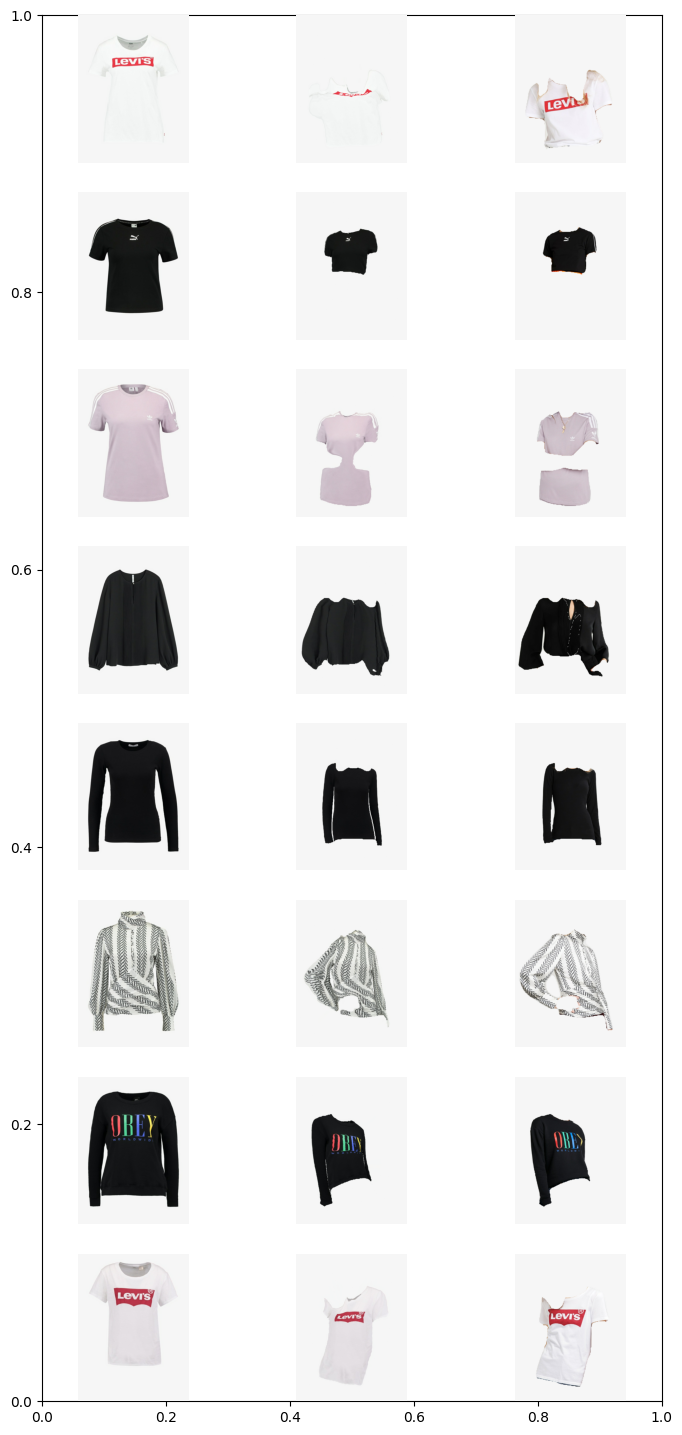

In [ ]:
train_preds = warp_model(train_inputs)

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(train_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(train_preds[-1][(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(train_ground_truths[(i//3), :, :, :])
    plt.axis(False)

plt.show()

### Validation Set

In [ ]:
val_sample = val_dataset.take(1).as_numpy_iterator().next()
val_inputs = val_sample[0]
val_ground_truths = val_sample[1][0]
val_mock_up = val_sample[0][2]

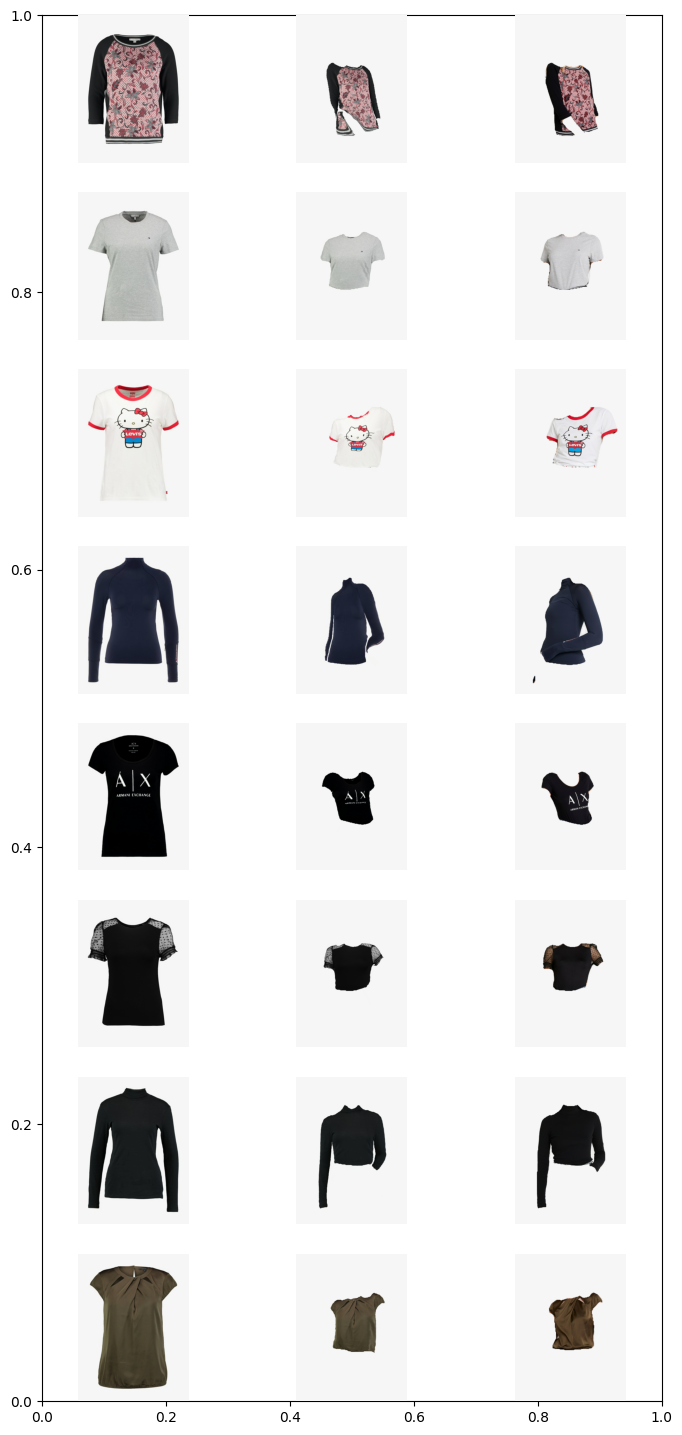

In [ ]:
val_preds = warp_model(val_inputs)

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(val_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(val_preds[-1][(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(val_ground_truths[(i//3), :, :, :])
    plt.axis(False)

plt.show()

### Testing Set

In [ ]:
test_sample = test_dataset.take(1).as_numpy_iterator().next()
test_inputs = test_sample[0]
test_ground_truths = test_sample[1][0]
test_mock_up = test_sample[0][2]

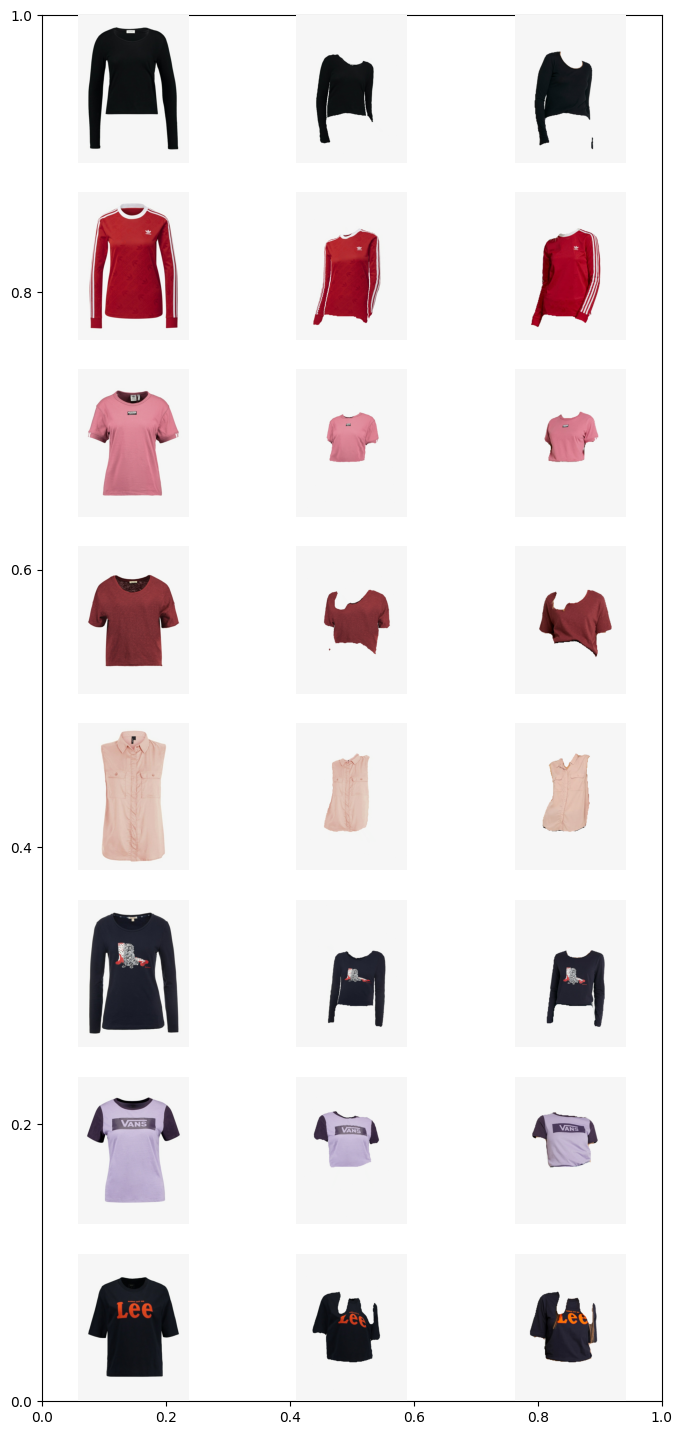

In [ ]:
test_preds = warp_model(test_inputs)

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(test_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(test_preds[-1][(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(test_ground_truths[(i//3), :, :, :])
    plt.axis(False)

plt.show()

In [ ]:
def warp_test_step(inputs, real_images) :
    flow = warp_unet(inputs, training=False)
    _, _, warp_images = warp_model(inputs, training=False)

    test_l1_loss = compute_l1_loss(real_images, warp_images)
    test_grad_loss = compute_grad_loss(flow)
    test_vgg_loss = compute_vgg_loss(real_images, warp_images)

    test_total_loss = 0.5 * test_grad_loss + 20 * test_l1_loss + 0.1 * test_vgg_loss

    return test_total_loss, test_vgg_loss, test_l1_loss, test_grad_loss

@tf.function
def distributed_warp_test_step(inputs, real_images):
    test_losses = strategy.run(warp_test_step, args=(inputs, real_images))

    test_per_replica_total_loss, test_per_replica_vgg_loss, test_per_replica_l1_loss, test_per_replica_grad_loss = test_losses

    test_total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_total_loss, axis=None)
    test_vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_vgg_loss, axis=None)
    test_l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_l1_loss, axis=None)
    test_grad_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_grad_loss, axis=None)

    return test_total_loss, test_vgg_loss, test_l1_loss, test_grad_loss

In [ ]:
test_total_loss, test_vgg_loss, test_l1_loss, test_grad_loss = 0, 0, 0, 0
test_num_batches = 0

for test_inputs, test_real_images in test_dataset :
    step_test_total_loss, step_test_vgg_loss, step_test_l1_loss, step_test_grad_loss = distributed_warp_test_step(test_inputs, test_real_images[0])

    test_total_loss += step_test_total_loss
    test_vgg_loss += step_test_vgg_loss
    test_l1_loss += step_test_l1_loss
    test_grad_loss += step_test_grad_loss

    test_num_batches += 1

mean_test_total_loss = test_total_loss / test_num_batches
mean_test_vgg_loss = test_vgg_loss / test_num_batches
mean_test_l1_loss = test_l1_loss / test_num_batches
mean_test_grad_loss = test_grad_loss / test_num_batches

print(f"Testing Loss : {mean_test_total_loss: .2f} \n\
Testing Perceptual Loss : {mean_test_vgg_loss: .2f} \n\
Testing MAE : {mean_test_l1_loss: .2f} \n\
Testing Grad Loss : {mean_test_grad_loss: .2f}")

I0000 00:00:1756034935.139500      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:4359926367875268804
E0000 00:00:1756034935.691047      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node assert_non_negative/assert_less_equal/Assert/Assert.
I0000 00:00:1756034936.660247    1121 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(2868011497490308100), session_name()
I0000 00:00:1756034947.703244    1121 tpu_compile_op_common.cc:245] Compilation of 2868011497490308100 with session name  took 11.04288818s and succeeded
I0000 00:00:1756034947.729669    1121 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(2868011497490308100), session_name(), subgraph_key(std::string(property.function_name) = "cluster_distributed_warp_test_step_4359926367875268804", property.function_library_fingerprint = 1374061760762866559, property.mlir_module_fingerp

Testing Loss :  1.81 
Testing Perceptual Loss :  11.67 
Testing MAE :  0.03 
Testing Grad Loss :  0.25


## Try-On Generator

In [ ]:
tryon_generator.load_weights('fine_tuned_tryon_generator_best.weights.h5')
discriminator.load_weights('fine_tuned_tryon_discriminator_best.weights.h5')

## Training Set

In [ ]:
train_sample = train_dataset.take(1).as_numpy_iterator().next()
train_sample_inputs = train_sample[0]
train_sample_ground_truths = train_sample[1][1]
train_sample_mock_up = train_sample[0][2]

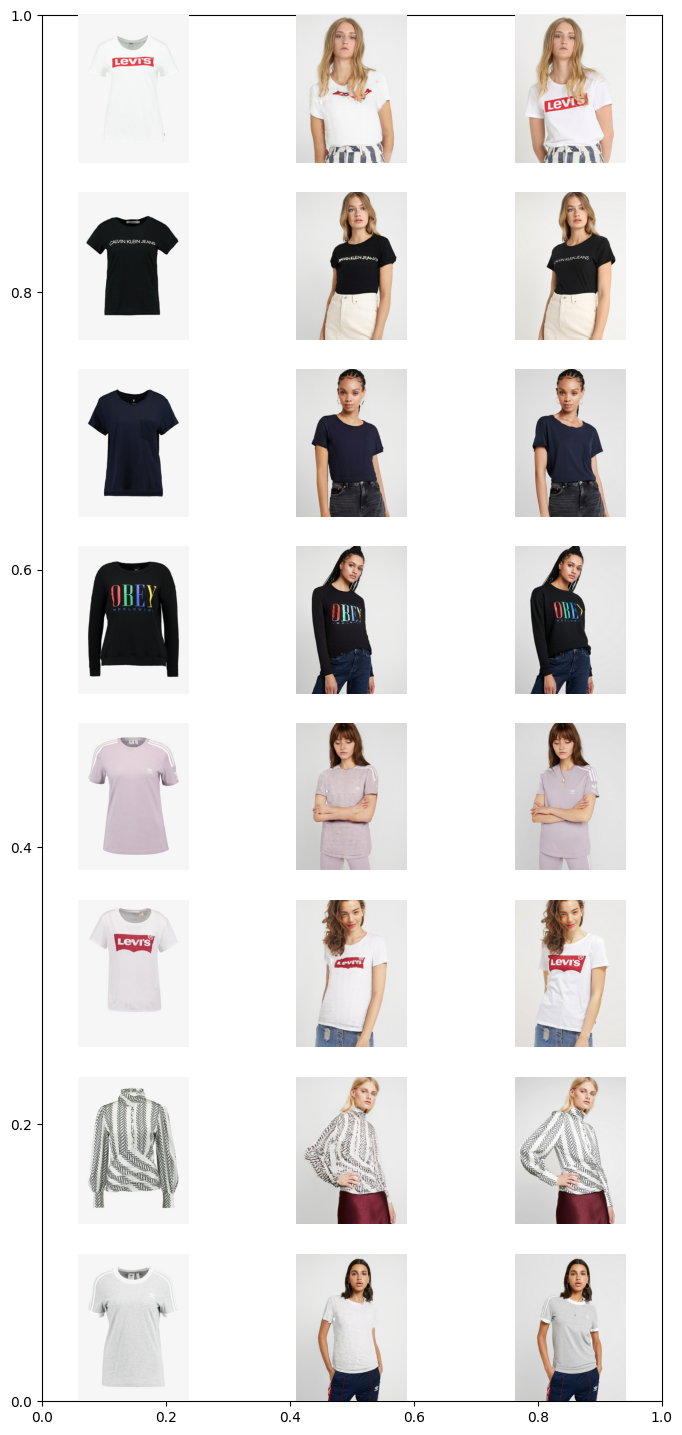

In [ ]:
train_sample_preds = tryon_generator(warp_model(train_sample_inputs))

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(train_sample_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(train_sample_preds[(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(train_sample_ground_truths[(i//3), :, :, :])
    plt.axis(False)

plt.show()

## Validation Set

In [ ]:
val_sample = val_dataset.take(1).as_numpy_iterator().next()
val_sample_inputs = val_sample[0]
val_sample_ground_truths = val_sample[1][1]
val_sample_mock_up = val_sample[0][2]

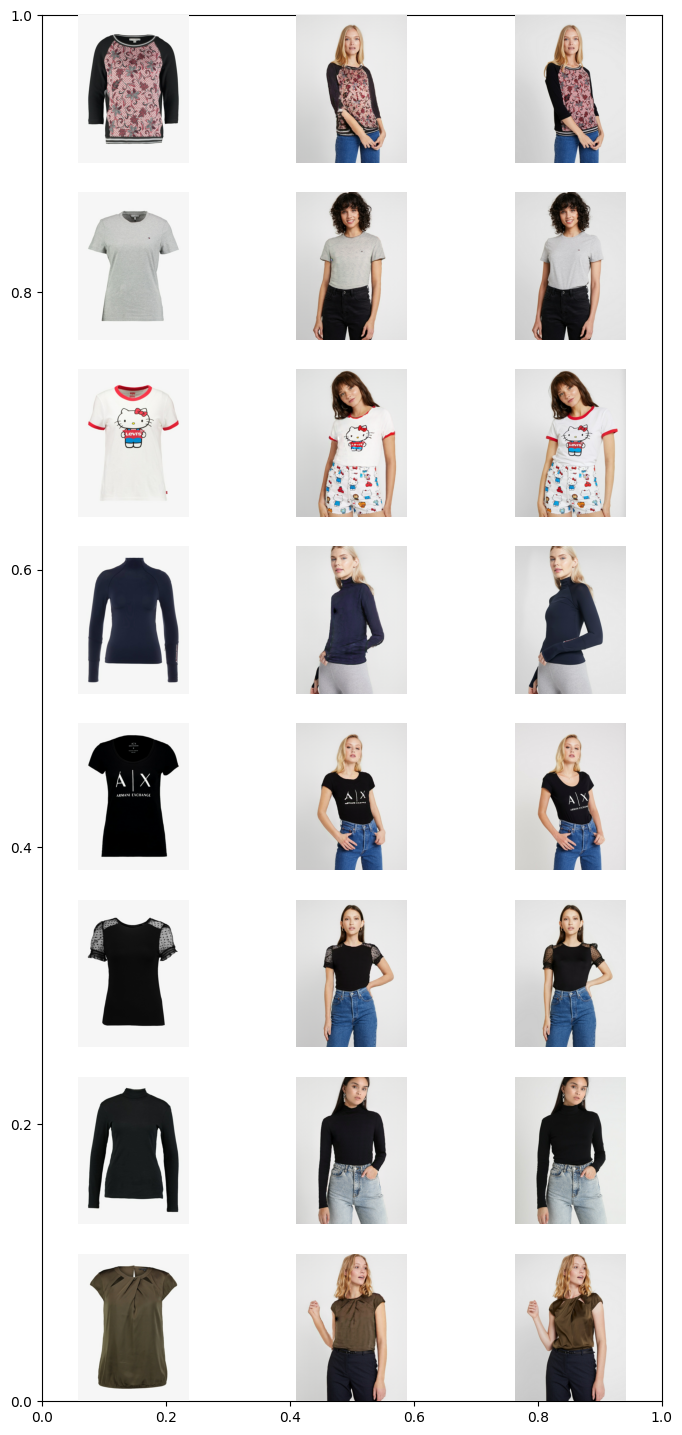

In [ ]:
val_sample_preds = tryon_generator(warp_model(val_sample_inputs))

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(val_sample_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(val_sample_preds[(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(val_sample_ground_truths[(i//3), :, :, :])
    plt.axis(False)

plt.show()

## Testing Set

In [ ]:
test_sample = test_dataset.take(1).as_numpy_iterator().next()
test_sample_inputs = test_sample[0]
test_sample_ground_truths = test_sample[1][1]
test_sample_mock_up = test_sample[0][2]

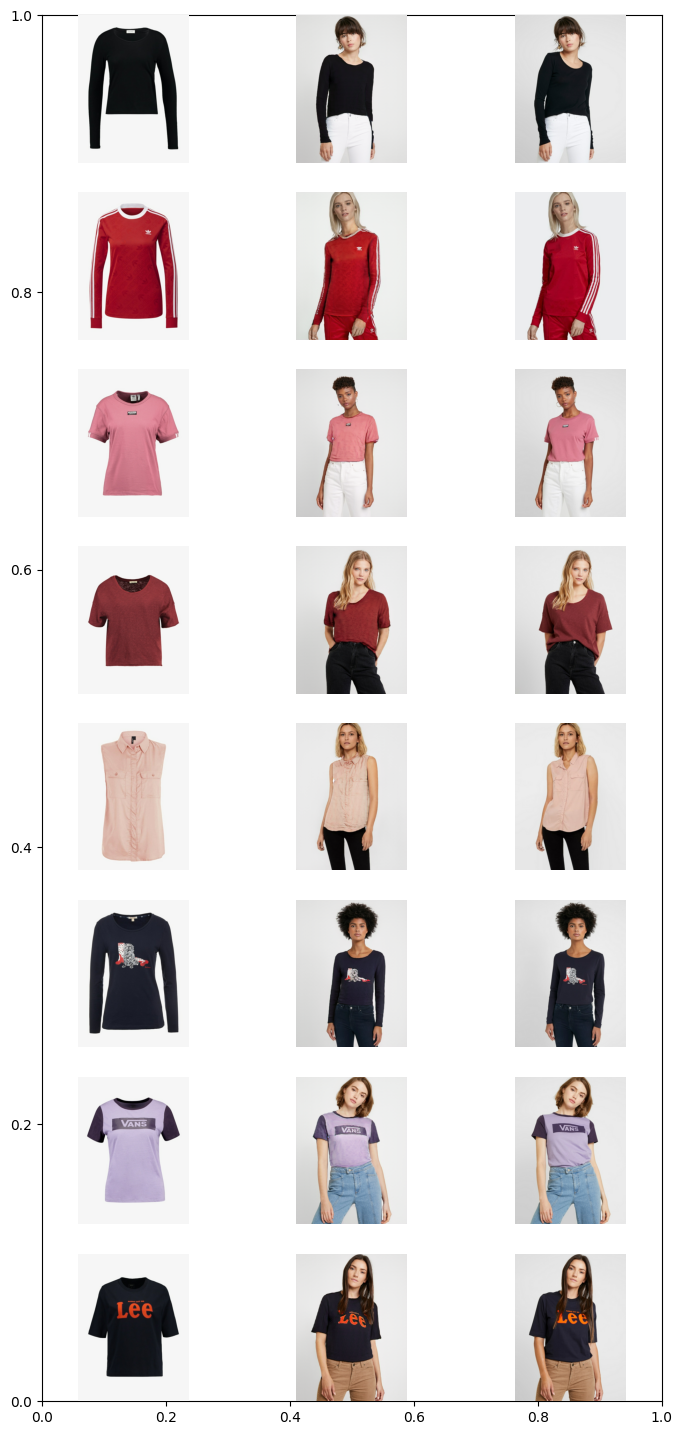

In [ ]:
test_sample_preds = tryon_generator(warp_model(test_sample_inputs))

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(test_sample_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(test_sample_preds[(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(test_sample_ground_truths[(i//3), :, :, :])
    plt.axis(False)

plt.show()

In [ ]:
def test_step(inputs, real_images) :
    fake_images = tryon_generator(warp_model(inputs, training=False), training=False)

    discriminator_real_output = discriminator((real_images, inputs[0], inputs[1]), training=False)
    discriminator_fake_output = discriminator((fake_images, inputs[0], inputs[1]), training=False)

    test_total_loss, test_gan_loss, test_vgg_loss, test_l1_loss = generator_loss(discriminator_fake_output,
                                                                                 fake_images,
                                                                                 real_images)

    test_disc_loss = discriminator_loss(discriminator_real_output, discriminator_fake_output)

    return test_total_loss, test_gan_loss, test_vgg_loss, test_l1_loss, test_disc_loss

@tf.function
def distributed_test_step(inputs, real_images):
    test_losses = strategy.run(test_step, args=(inputs, real_images))

    test_per_replica_total_loss, test_per_replica_gan_loss, test_per_replica_vgg_loss, test_per_replica_l1_loss, test_per_replica_discriminator_loss = test_losses

    test_total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_total_loss, axis=None)
    test_gan_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_gan_loss, axis=None)
    test_vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_vgg_loss, axis=None)
    test_l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_l1_loss, axis=None)
    test_disc_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_discriminator_loss, axis=None)

    return test_total_loss, test_gan_loss, test_vgg_loss, test_l1_loss, test_disc_loss

In [ ]:
test_total_loss, test_gan_loss, test_vgg_loss, test_l1_loss, test_disc_loss = 0, 0, 0, 0, 0
test_num_batches = 0

for test_inputs, test_real_images in test_dist_data :
    step_test_total_loss, step_test_gan_loss, step_test_vgg_loss, step_test_l1_loss, step_test_discriminator_loss = distributed_test_step(test_inputs, test_real_images[1])

    test_total_loss += step_test_total_loss
    test_gan_loss += step_test_gan_loss
    test_vgg_loss += step_test_vgg_loss
    test_l1_loss += step_test_l1_loss
    test_disc_loss += step_test_discriminator_loss

    test_num_batches += 1

mean_test_total_loss = test_total_loss / test_num_batches
mean_test_gan_loss = test_gan_loss / test_num_batches
mean_test_vgg_loss = test_vgg_loss / test_num_batches
mean_test_l1_loss = test_l1_loss / test_num_batches
mean_test_discriminator_loss = test_disc_loss / test_num_batches

print(f"Testing Loss : {mean_test_total_loss: .2f}\n\
Testing GAN Loss : {mean_test_gan_loss: .2f}\n\
Testing Perceptual Loss : {mean_test_vgg_loss: .2f}\n\
Testing MAE : {mean_test_l1_loss: .2f}\n\
Testing Discriminator Loss : {mean_test_discriminator_loss: .2f}")

I0000 00:00:1756101460.881950      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:17722627556895913118
E0000 00:00:1756101461.579066      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node assert_non_negative/assert_less_equal/Assert/Assert.
I0000 00:00:1756101462.841115    1106 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(14060628943063197760), session_name()
I0000 00:00:1756101485.413353    1106 tpu_compile_op_common.cc:245] Compilation of 14060628943063197760 with session name  took 22.572172798s and succeeded
I0000 00:00:1756101485.462997    1106 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(14060628943063197760), session_name(), subgraph_key(std::string(property.function_name) = "cluster_distributed_test_step_17722627556895913118", property.function_library_fingerprint = 2346387727738584507, property.mlir_module_finger

Testing Loss :  4.84
Testing GAN Loss :  0.26
Testing Perceptual Loss :  14.63
Testing MAE :  0.04
Testing Discriminator Loss :  0.25


## SSIM

In [ ]:
def compute_ssim(real_images, fake_images) :
    per_example_ssim = tf.image.ssim(real_images, fake_images, max_val=1.0)
    ssim_score = tf.nn.compute_average_loss(per_example_ssim, global_batch_size=BATCH_SIZE)

    return ssim_score

In [ ]:
def ssim_step(inputs, real_images) :
    fake_images = tryon_generator(warp_model(inputs, training=False), training=False)

    ssim_score = compute_ssim(real_images, fake_images)
    return ssim_score

@tf.function
def distributed_ssim_step(inputs, real_images) :
    ssim_score_per_replica = strategy.run(ssim_step, args=(inputs, real_images))

    total_ssim_score = strategy.reduce(tf.distribute.ReduceOp.SUM, ssim_score_per_replica, axis=None)
    return total_ssim_score

In [ ]:
train_ssim_score = 0
val_ssim_score = 0
test_ssim_score = 0
train_num_batches = 0
val_num_batches = 0
test_num_batches = 0

for train_inputs, train_real_images in train_dist_data :
    train_ssim_score += distributed_ssim_step(train_inputs, train_real_images[1])
    train_num_batches += 1

for val_inputs, val_real_images in val_dist_data :
    val_ssim_score += distributed_ssim_step(val_inputs, val_real_images[1])
    val_num_batches += 1

for test_inputs, test_real_images in test_dist_data :
    test_ssim_score += distributed_ssim_step(test_inputs, test_real_images[1])
    test_num_batches += 1

I0000 00:00:1756101710.398694      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:535562819148819348
E0000 00:00:1756101711.012232      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SSIM/Assert/Assert.
I0000 00:00:1756101712.157959    1128 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(5285758316566375885), session_name()
I0000 00:00:1756101746.799509    1128 tpu_compile_op_common.cc:245] Compilation of 5285758316566375885 with session name  took 34.64150666s and succeeded
I0000 00:00:1756101746.852053    1128 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(5285758316566375885), session_name(), subgraph_key(std::string(property.function_name) = "cluster_distributed_ssim_step_535562819148819348", property.function_library_fingerprint = 13025330189516985404, property.mlir_module_fingerprint = 0, property.num_replicas = 8, to

In [ ]:
print(f"Mean Training SSIM = {train_ssim_score / train_num_batches : .5f}")
print(f"Mean Validation SSIM = {val_ssim_score / val_num_batches : .5f}")
print(f"Mean Testing SSIM = {test_ssim_score / test_num_batches : .5f}")

Mean Training SSIM =  0.83628
Mean Validation SSIM =  0.78910
Mean Testing SSIM =  0.79789


# Experiment with Other Clothes

In [ ]:
with open('/kaggle/input/high-resolution-viton-zalando-dataset/test_pairs.txt') as f:
    pairs = f.read().split('\n')
    pairs = [p.replace('.jpg', '') for p in pairs]


In [ ]:
random_pairs = np.random.choice(pairs, size=8, replace=False)

In [ ]:
random_person = np.array([cv2.resize(cv2.cvtColor(cv2.imread(f'/kaggle/input/high-resolution-viton-zalando-dataset/test/image/{filename.split()[0]}.jpg'), cv2.COLOR_BGR2RGB), (384, 512)) for filename in random_pairs], dtype=np.float32)
random_clothes = np.array([cv2.resize(cv2.cvtColor(cv2.imread(f'/kaggle/input/high-resolution-viton-zalando-dataset/test/cloth/{filename.split()[1]}.jpg'), cv2.COLOR_BGR2RGB), (384, 512)) for filename in random_pairs], dtype=np.float32)
random_agnostic = np.array([cv2.resize(cv2.cvtColor(cv2.imread(f'/kaggle/input/high-resolution-viton-zalando-dataset/test/image-parse-agnostic-v3.2/{filename.split()[0]}.png'), cv2.COLOR_BGR2RGB), (384, 512)) for filename in random_pairs], dtype=np.float32)
random_clothes_segment = np.array([cv2.resize(cv2.cvtColor(cv2.imread(f'/kaggle/input/high-resolution-viton-zalando-dataset/test/cloth-mask/{filename.split()[1]}.jpg'), cv2.COLOR_BGR2RGB), (384, 512)) for filename in random_pairs], dtype=np.float32)

random_person = tf.data.Dataset.from_tensor_slices(random_person).map(lambda x: x / 255)
random_clothes = tf.data.Dataset.from_tensor_slices(random_clothes).map(lambda x: x / 255)
random_agnostic = tf.data.Dataset.from_tensor_slices(random_agnostic)
random_clothes_segment = tf.data.Dataset.from_tensor_slices(random_clothes_segment)

random_clothes_segment = random_clothes_segment.map(threshold_clothes_mask)
random_landmark = random_person.map(apply_mediapipe).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))
random_person_agnostic = tf.data.Dataset.zip(random_person, random_agnostic).map(lambda x, y: filter_clothes(x, y))

random_inputs = tf.data.Dataset.zip(random_person_agnostic, random_landmark, random_clothes, random_clothes_segment, random_person).batch(8).take(1).as_numpy_iterator().next()

In [ ]:
random_outputs = tryon_generator(warp_model(random_inputs[:-1]))

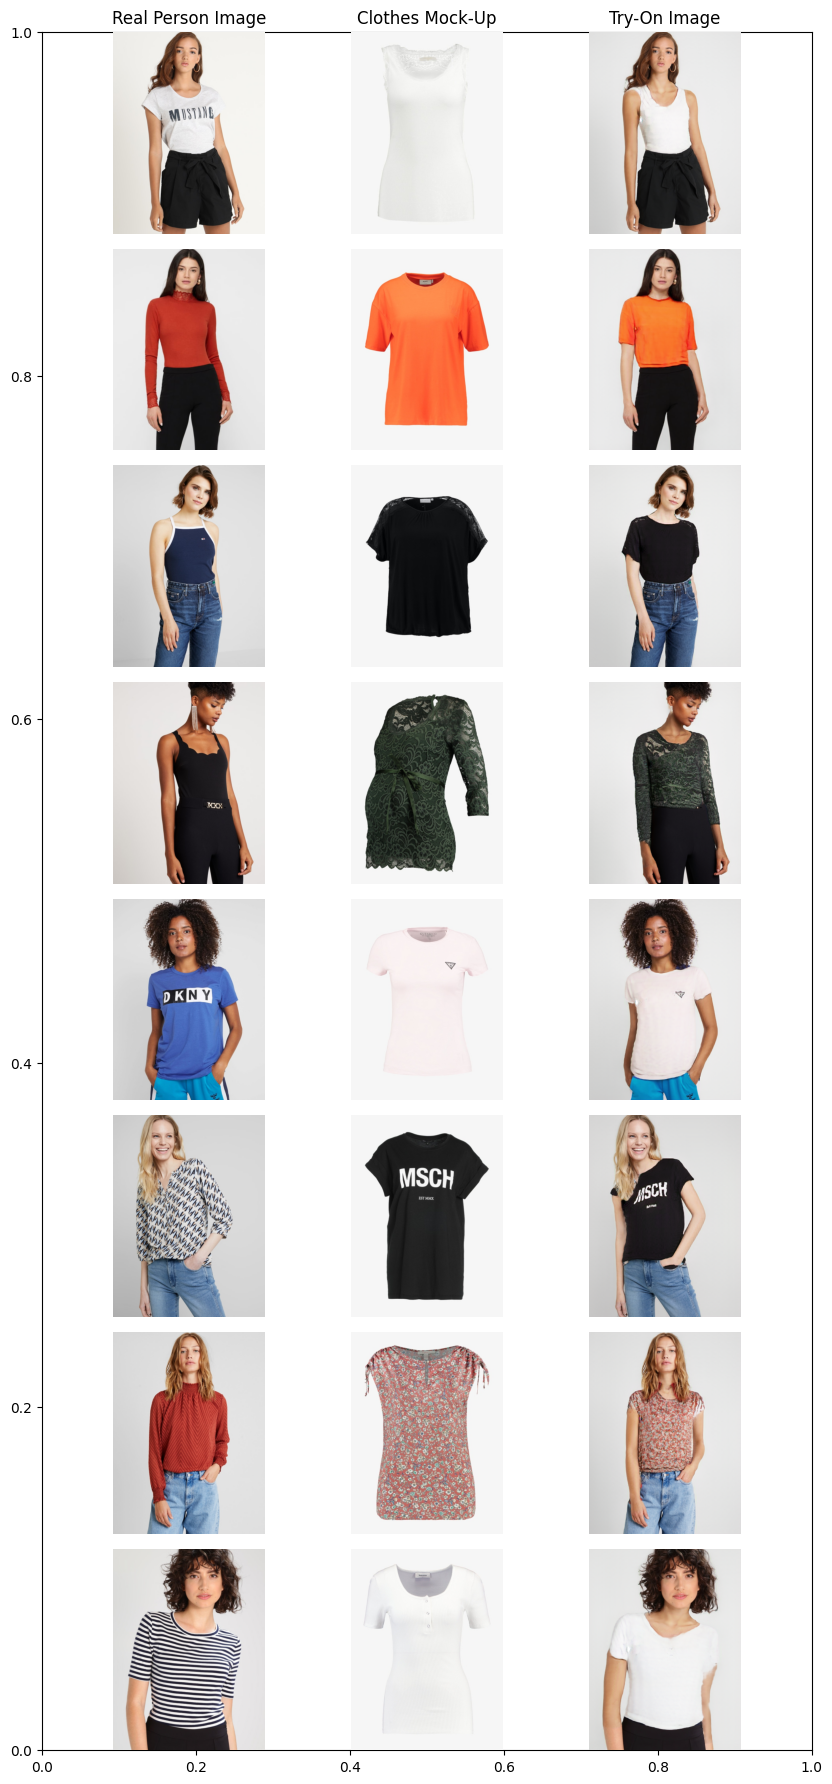

In [ ]:
plt.subplots(figsize=(8, 18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.axis(False)
    plt.imshow(random_inputs[-1][(i//3), :, :, :])
    if i == 0 :
        plt.title("Real Person Image")

    plt.subplot(8, 3, i+2)
    plt.axis(False)
    plt.imshow(np.clip(random_inputs[2][(i//3), :, :, :], 0, 1))
    if i == 0 :
        plt.title("Clothes Mock-Up")

    plt.subplot(8, 3, i+3)
    plt.axis(False)
    plt.imshow(random_outputs[(i//3), :, :, :])
    if i == 0 :
        plt.title("Try-On Image")

plt.tight_layout()
plt.show()